In [34]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [29]:
#Loading dataset
df = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
print("Quantidade de elementos de treino: {}". format(len(x_train)))
print(x_train.shape)

Quantidade de elementos de treino: 60000
(60000, 28, 28)


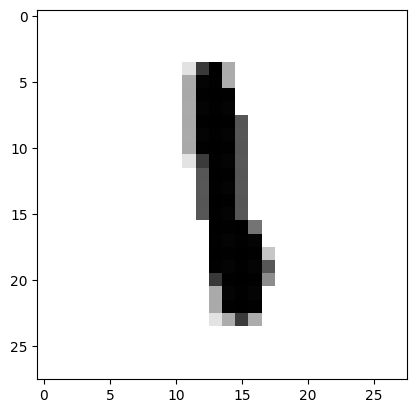

Label: 1


In [16]:
#Image visualization
plt.imshow(x_train[200].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(y_train[200]))

In [18]:
# Transformando a imagem 2d em um numpy array (imagem 28*28 = 784 pixels)
x = x_train.reshape(60000, 784)

#Normalizando para valores entre 0 e 1
x = x.astype('float32')
x /= 255

print(x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [20]:
# Ajustando o formato da saida
num_classes = 10

# Convertendo para um vetor de saida com 10 dimensoes
# ex. 8 => [0,0,0,0,0,0,0,0,1,0]
y = keras.utils.to_categorical(y_train, num_classes)
print(y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [35]:
# Separando uma parte para treino (90%) e outra para validação (10%)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=9)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

Qtde de treino: 54000
Qtde de validação: 6000


In [36]:
# Criando o modelo Sequential
# Sequential: Modelo Keras de ir adicionando camadas (como um lego)
# Dense: Camada onde todas as entradas estão conectadas em cada neurônio (totalmente conectada)
# Dropout: Camada usa durante treino que descarta aleatoriamente um percentual de conexões (reduz overfitting)

model = Sequential()
# Camada com 30 neurônios
model.add(Dense(30, activation='relu', input_shape=(784,)))
# Dropout de 20%
model.add(Dropout(0.2))
# Camada de 20 neurônios
model.add(Dense(20, activation='relu'))
# Dropout de 20%
model.add(Dropout(0.2))
# Camda de classificação final, com 1 neurônio para cada classe de saída. Softmax divide a probabilidade de cada classe.
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 24380 (95.23 KB)
Trainable params: 24380 (95.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [38]:
# Treina com os parte dos dados
batch_size = 32
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7014 - accuracy: 0.7769 - val_loss: 0.2831 - val_accuracy: 0.9142
Epoch 2/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4122 - accuracy: 0.8798 - val_loss: 0.2367 - val_accuracy: 0.9300
Epoch 3/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3674 - accuracy: 0.8946 - val_loss: 0.2166 - val_accuracy: 0.9388
Epoch 4/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3379 - accuracy: 0.9044 - val_loss: 0.2046 - val_accuracy: 0.9418
Epoch 5/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3264 - accuracy: 0.9084 - val_loss: 0.2100 - val_accuracy: 0.9407
Epoch 6/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.9141 - val_loss: 0.2019 - val_accuracy: 0.9465
Epoch 7/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3097 - accuracy: 0.9137 - val_loss: 0.2027 - val_accuracy:

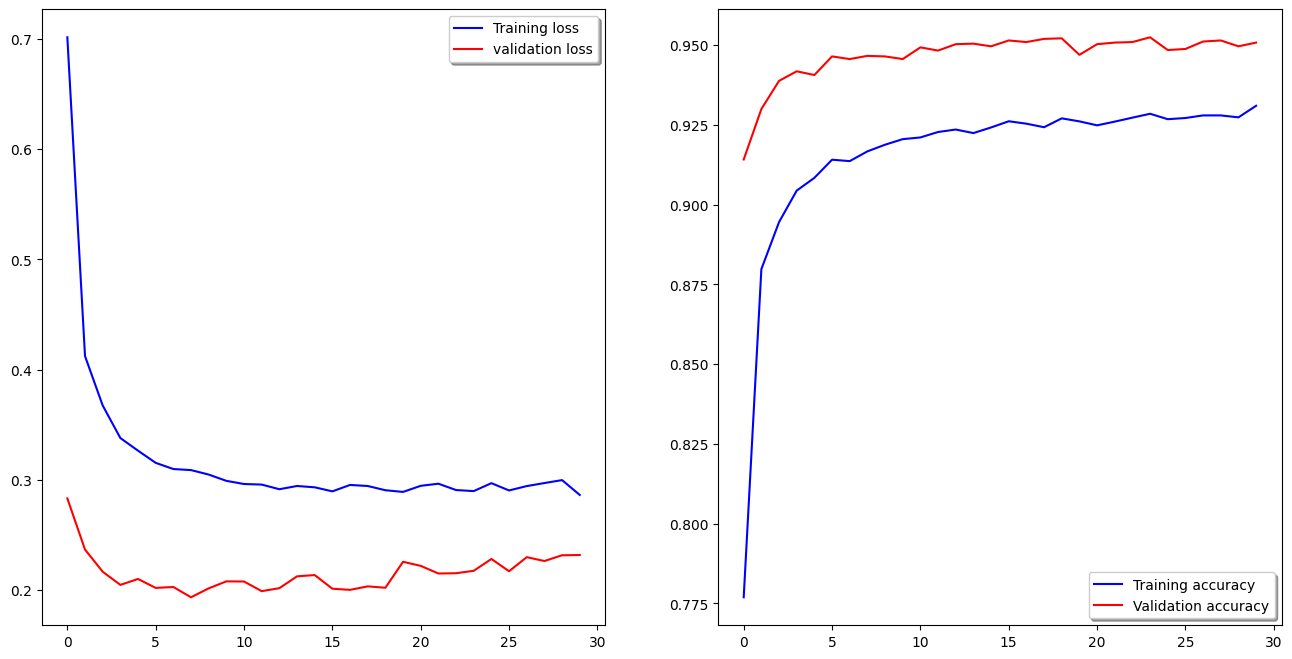

In [43]:
#Vamos ver como foi o treino?
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)